#그리디 알고리즘-개념

현재 상황에서 지금 당장 좋은 것만 고르는 방법
---> 최적의 해를 구해라.

##문제 1

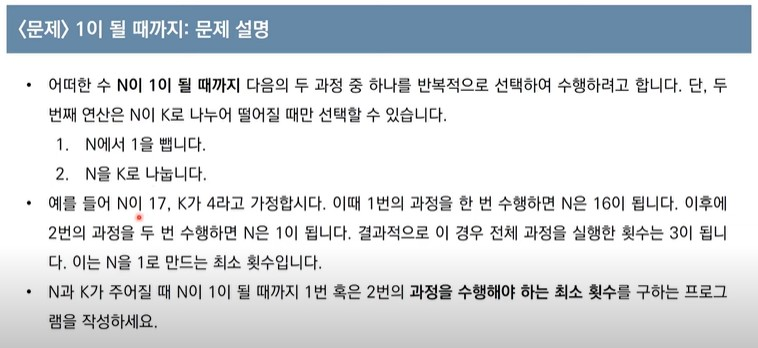

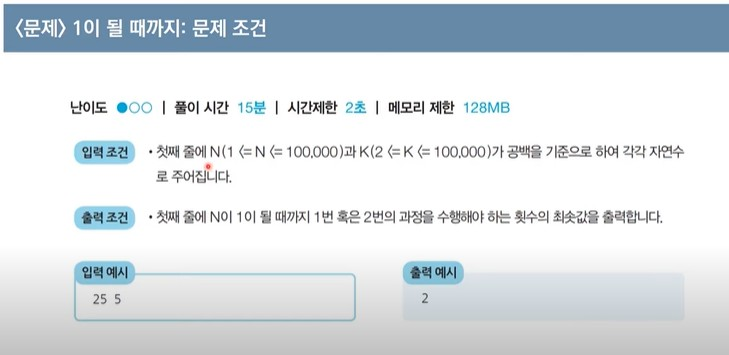

###1트
발상

1. input으로 n과 k를 받아야 한다.

2. 무한루프 반복문을 사용

3. 반복문에서 n-1, n/k를 구현한다.

4. n==1이면 break를 걸어 반복문을 멈춘다.

In [ ]:
n,k = input().split()

n = int(n)
k = int(k)

print(n)
print(k)

25 5
25
5


In [ ]:
count = 1
while True:
  if n % k == 0:
    n = n / k
  else: 
    n = n-1
  if n == 1:
    break
  else:
    pass
  count = count + 1
print(count)

2


최종 결과

In [ ]:
import time
start_time = time.time() # 측정 시작

n,k = input().split()

n = int(n)
k = int(k)


count = 1
while True:
  if n % k == 0:
    n = n / k
  else: 
    n = n-1
  if n == 1:
    break
  else:
    pass
  count = count + 1
print(count)

end_time = time.time() # 측정 종료
print("time : ", end_time - start_time) # 수행 시간 출력

25 5
2
time :  2.0433571338653564


###나코테 답안

In [ ]:
import time
start_time = time.time() # 측정 시작

n,k = map(int,input().split())

result = 0

while True:
  target = (n//k) * k
  result += (n-target)
  n = target

  if n < k:
    break
  result += 1
  n//= k
result += (n-1)
print(result)
end_time = time.time() # 측정 종료
print("time : ", end_time - start_time) # 수행 시간 출력

25 5
2
time :  1.9947028160095215


위 나코테 답안의 시간이 더 빠르다.

나는 나누고 아니면 -1을 해주는 걸 반복해서 풀었다.

하지만 답안은 나누고 -1로 보내는 과정을 계속 나누어지게 만들어 생략했다. 

난 이걸 문제 그대로 풀려고 했다. 하지만 답안은 문제에 초점을 맞추기보다는 최대한 숫자를 줄이는 걸 주로 하고 그 보조로 문제의 조건을 사용했다. 무엇을 주요 과제로 설명하는지 체크하는 습관이 꼭 필요하다.

##문제 2

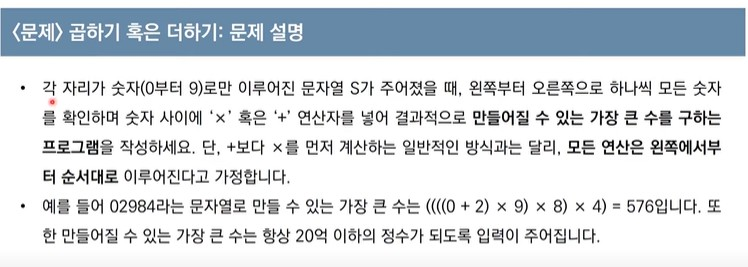



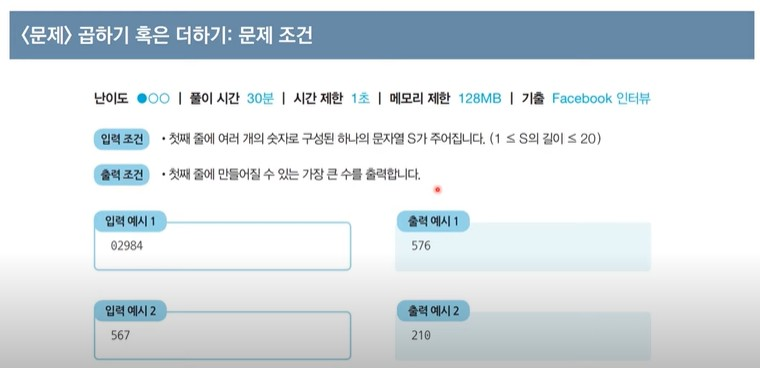

###발상
1. n을 받기
2. split하기(다른 방법이 없을까?)
3. 0과1을 따로 뺴고 반복문 또는 0과 1을 포함한 반복문

###풀이 1  모두 무지성 split
----> 리스트의 요소 갯수 만큼 시간 복잡도가 올라감. 비효율적?

### 풀이 2 0과1을 따로 뺴서 1만큼 sum하고 나머지 split
그나마 미리 리스트의 갯수를 줄이고 시작해서 좀 줄듯?

### 풀이 2-1 리스트 곱을 하는 다양한 방법
1. for i in list
2. eval----> 메타프로그레밍의 일종으로 문자열을 계산 할 수 있다. exec와 비슷하게 쓰임. 

  하지만 eval은 파이썬의 **식**을 받아서 파이썬 컴파일 코드로 변환하는 것이고,

  exec는 문자열로 표현된 **문**을 받아 컴파일 코드로 변환

1. eval

In [ ]:
import time
start_time = time.time() # 측정 시작

n = input()
n = list(n)
n = list(map(int,n))

#0과 1만 있는 리스트로 분리
n = sorted(n)
new_n = []
for i in range(len(n)):
  if n[i] >=2:
    break
  else:
    new_n.append(i)
    del n[i]

#eval사용하기 위해 문자열로 변환
n = list(map(str,n))

#join함수로 각 문자열 사이에 *를 집어 넣기
n_triple = eval('*'.join(n))
new_n_sum = sum(new_n)

print(n_triple + new_n_sum)

end_time = time.time() # 측정 종료
print("time : ", end_time - start_time) # 수행 시간 출력

02984
576
time :  1.3687775135040283


2. for i in 

In [ ]:
import time
start_time = time.time() # 측정 시작

n = input()
n = list(n)
n = list(map(int,n))

#0과 1만 있는 리스트로 분리
n = sorted(n)
new_n = []
for i in range(len(n)):
  if n[i] >=2:
    break
  else:
    new_n.append(i)
    del n[i]

value = 1
for i in n:
  value = value * i
new_n_sum = sum(new_n)

print(new_n_sum + value)

end_time = time.time() # 측정 종료
print("time : ", end_time - start_time) # 수행 시간 출력

02984
576
time :  1.3043947219848633


3. 교제 풀이

In [ ]:
import time
start_time = time.time() # 측정 시작

data = input()

for i in range(1,len(data)):
  num = int(data[i])
  if num <= 1 or result <= 1:
    result += num
  else:
    result *= num

print(result)


end_time = time.time() # 측정 종료
print("time : ", end_time - start_time) # 수행 시간 출력

02984
663552
time :  1.2987329959869385


##문제 3

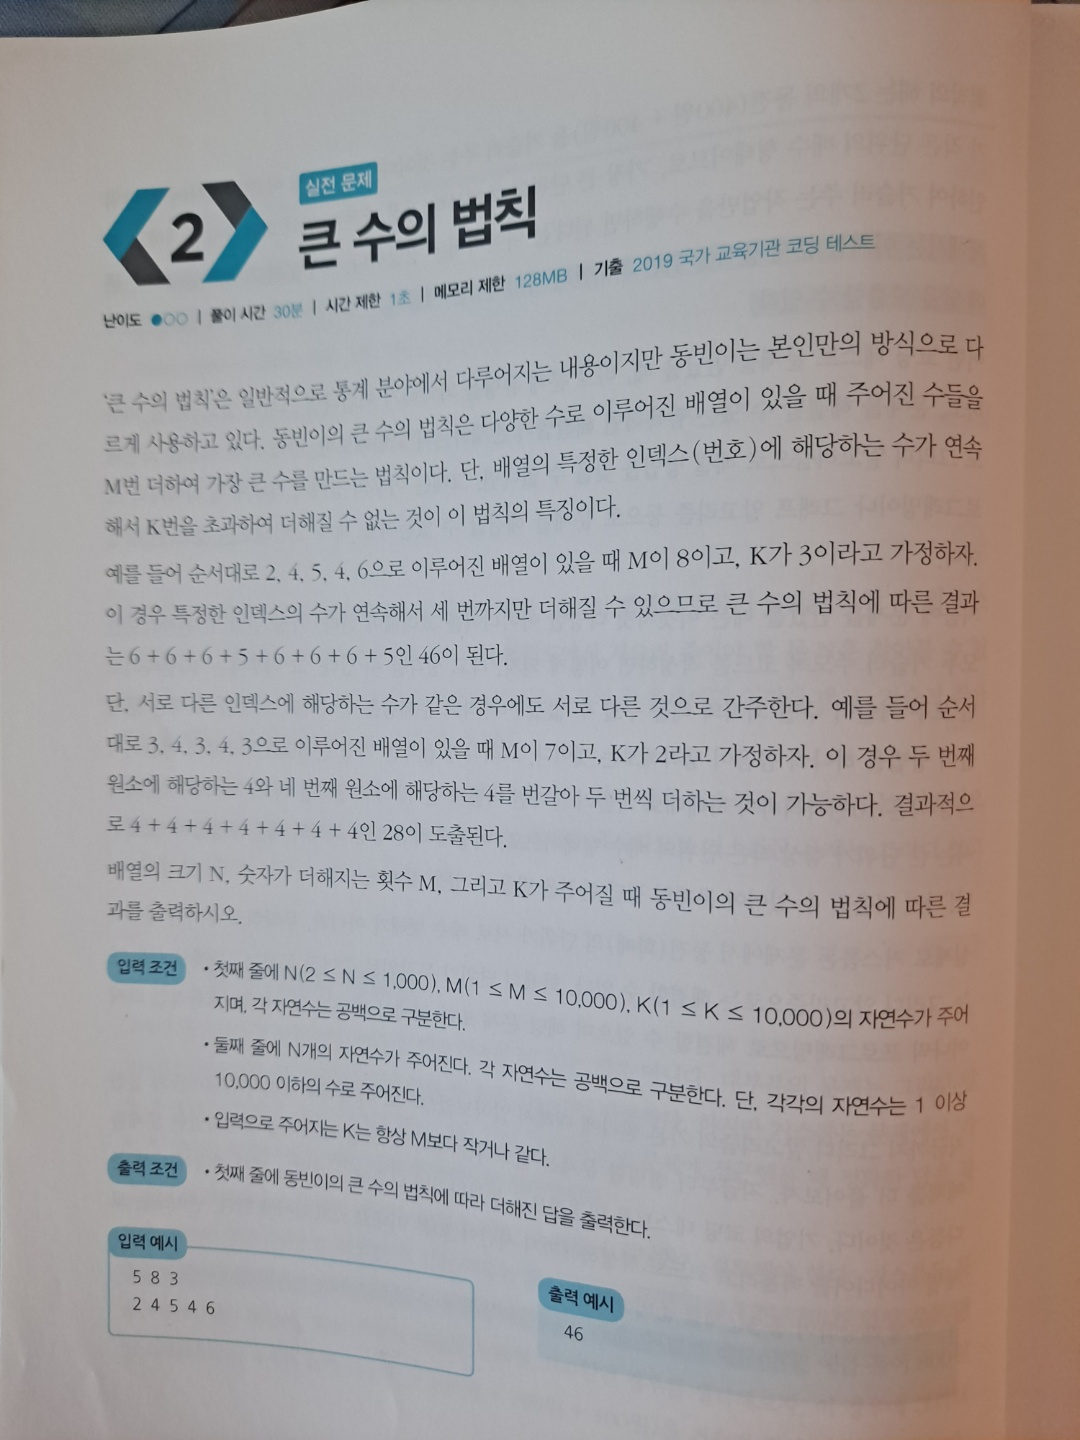

###발상
1. input을 받기
2. 리스트 내부에 max값이 2개 이상인지 아닌지 찾아라
3. 만일 max값이 2개 이상이라면 max_value * 갯수
4. max 값이 하나만 있다면 max를 k개 max-1번 리스트를 1개로 반복하면서 총 덧셈의 최대 배열이 m이 될때까지 반복문으로 돌린다.

max값이 2개 이상 ----> 어찌 찾지?

1. 전체 배열을 뒤지면서 해당하면 count + 1
2. collections 라이브러리에 counters 모듈을 사용

1. collections 라이브러리 사용해서 푸는 방법

In [ ]:
import time
start_time = time.time() # 측정 시작


N,M,K = input().split()
N = int(N)
M = int(M)
K = int(K)

list_A = input().split()

list_A = list(map(int,list_A))

#dict으로 반복의 갯수를 키와 벨류로 구분
from collections import Counter
Counter_list_A = Counter(list_A)
dict_A = dict(Counter_list_A)

#최대 키 값을 구하자.
dict_A_keys = dict_A.keys()

list_B = list_A.copy()
list_B.remove(max(list_B))

#최대 키 값의 value를 구하자.
num = M//K
other = M%K
value_list = []
if dict_A[max(dict_A_keys)] >= 2:
  print(max(dict_A_keys) * M)
else:
  for i in range(0,num):
    value_list.append((max(list_A)*(K-1)) + max(list_B))
#남은거 계산
  if other <= K-1:
    value_list.append(max(list_A) * (K-1))
print(sum(value_list))   

end_time = time.time() # 측정 종료
print("time : ", end_time - start_time) # 수행 시간 출력

5 8 3
2 4 5 4 6
46
time :  9.090057849884033


이코테 풀이

In [ ]:
import time
start_time = time.time() # 측정 시작

n,m,k = map(int,input().split())
data = list(map(int,input().split()))

data.sort()
first = data[n-1]
second = data[n-2]

result = 0

while True:
  for i in range(k):
    if m == 0:
      break
    result += first
    m -= 1
  if m == 0:
    break
  result += second
  m -= 1

print(result)

end_time = time.time() # 측정 종료
print("time : ", end_time - start_time) # 수행 시간 출력

5 8 3
2 4 5 4 6
46
time :  6.113183975219727


나와 다른점

난 max값을 구하기 위해 max함수를 썼다. 그리고 max보다 작은 값을 구하기 위해서 새로운 리스트를 만들고 del을 통해서 그 del한 리스트의 최댓값을 구하는 방식으로 구현했다.

하지만 여기는 sort를 통해 정말 간편하게 값들을 구했다.

그리고 시간복잡도를 생각해서 여러 반복문을 최대한 적게 쓸려고 무한 루프를 안돌렸는데, 오히려 돌리는게 더 시간이 빠르게 나왔다. 앞으로 무한루프로 만들어보고 비교해서 답안을 제출하면 좋을것 같다.

##문제 4

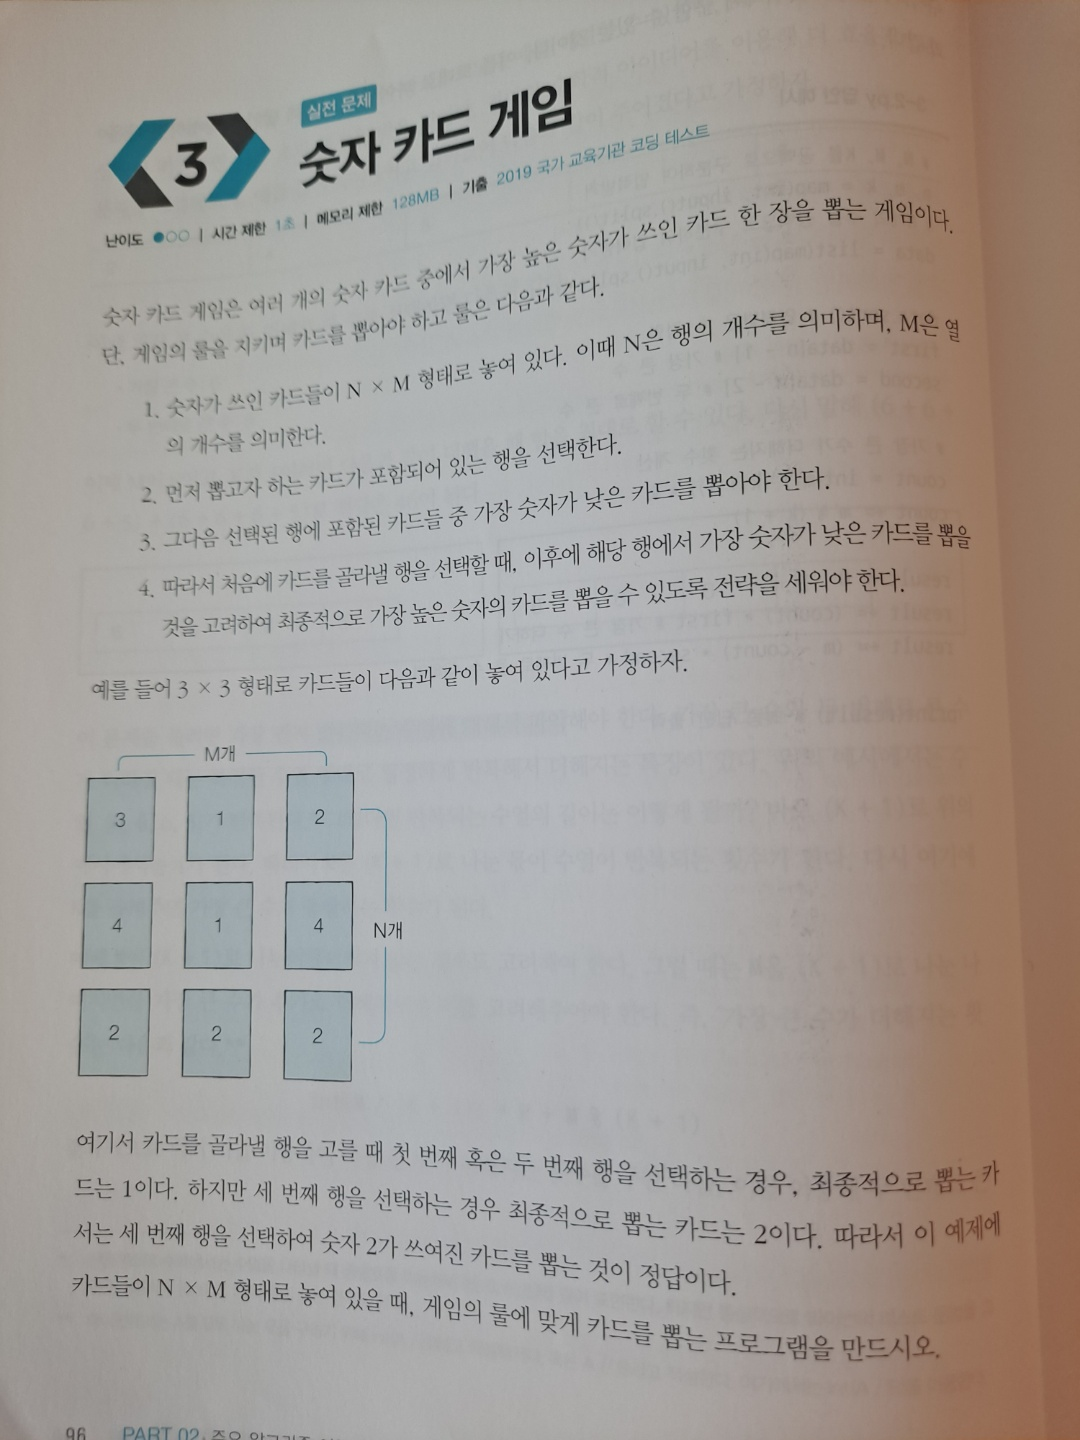

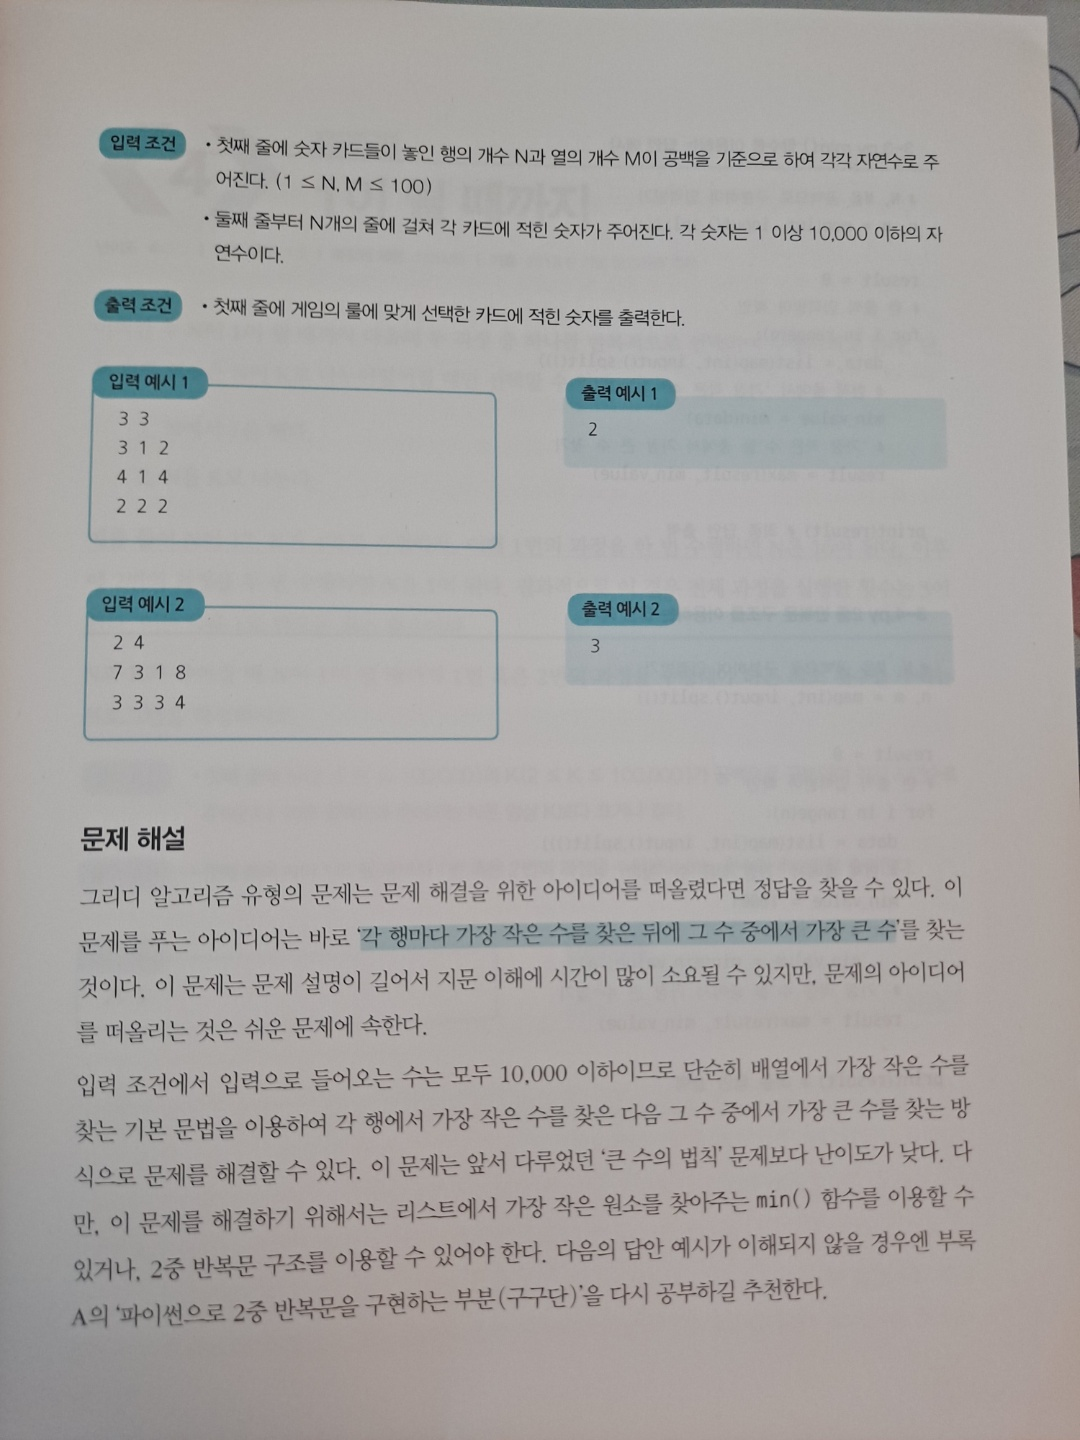

발상 

1. 각 행을 input해야 한다.
2. 이 수중 각 행에서 가장 작은 수를 구해라.
3. 그 뽑은 수들 중 가장 큰 수를 답으로 정해라.

#1. 풀이

In [2]:
col, row = list(map(int,input().split()))
min_list=[]
for i in range(col):
  A = list(map(int,input().split()))
  min_list.append(min(A))
print(max(min_list))

2 4
7 3 1 8
3 3 3 4
3
